In [12]:
!pip install numpy pandas matplotlib seaborn imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("survey lung cancer.csv")

# Lung Cancer Analysis (Project 2)

### What is the problem?
Lung cancer is one of the leading causes of death worldwide. Early detection can significantly improve survival rates. The goal of this project is to build a classification model that predicts whether an individual has lung cancer based on factors such as smoking habits, symptoms, and other health-related conditions. Overall, this could help individuals that find themselves fitting some of the categories represented in the data set and hopefully change their lifestyle or understand the risks that are usually associated with eventually getting diagnosed with lung cancer.

### Questions we are trying to answer?

1. **What factor is the most likely to lead to developing lung cancer?**
2. **What factor is the least likely to lead to developing lung cancer??**
3. **Are there any unexpected patterns or relationships in the data that might provide new insights into lung cancer risk?**

### Introducing the Data
For this project, I found a data set called utilizing the sites Kaggle. You can directly go to the dateset to view/download it by clicking <a href="https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer/data" id="url" runat="server">HERE</a>. This datset simply shows different specifications in the form of categories that are directly linked to possibly having lung cancer.
#### Dateset Information: 
This dateset contains 16 columns, with a mix of categorical and numerical data: The columns in the dateset are as follows:
- Gender (Categorical)
- Age (Numerical)
- Smoking (Categorical)
- Yellow Fingers (Categorical)
- Anxiety (Categorical)
-  Peer Pressure (Categorical)
-  Chronic Disease (Categorical)
-  Fatigue (Categorical)
-  Allergies (Categorical)
-  Wheezing (Categorical)
-  Alcohol Consuming (Categorical)
-  Coughing (Categorical)
-  Shortness of Breath (Categorical)
-  Swallowing Difficulty (Categorical)
-  Chest Pain (Categorical)
-  Lung Cancer (Categorical)

### Displays the basic information for the data set that was previously explained above.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

### Showing the first 5 rows of the data. This was done as a check to ensure that I properly read my dataset.

In [ ]:
df.head()

### Showing the summary of statistical data for the columns that are numerical.

In [35]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


### Checking to see if there are any null values in the dataset.

In [38]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

### Checking class distribution for the target variable which is Lung Cancer.
As we can see, this data set is badly imbalanced. As, we move through the steps we will do some techniques to help balance the dataset as we move into classification and modeling for this project.

In [43]:
(df["LUNG_CANCER"].value_counts())

LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64

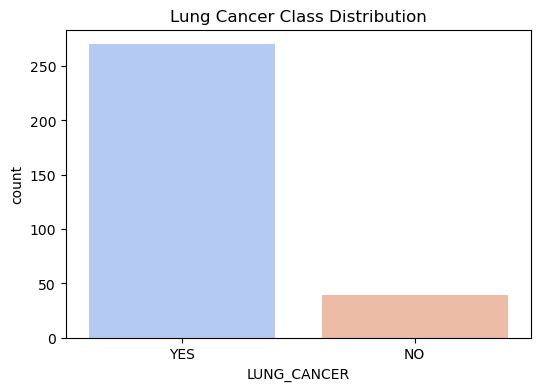

In [50]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["LUNG_CANCER"], palette="coolwarm")
plt.title("Lung Cancer Class Distribution")
plt.show()